<a href="https://colab.research.google.com/github/abhimanyu922/ZOMATO-EDA-PROJECT/blob/main/ZOMATO_EDA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ZOMATO DATA ANALYSIS PROJECT

<img src="https://upload.wikimedia.org/wikipedia/commons/7/75/Zomato_logo.png" alt="Zomato Logo" width="300"/>


#### Zomato, one of India's leading food delivery platforms, currently serves an average of 17.5 million monthly transacting customers through its food delivery services. Over the past year, the platform has also seen a steady rise in participation from restaurants, with the average number of monthly active food delivery restaurant partners increasing by 8.7%, growing from 208,000 to 226,000.

In this project, you are working as a Data Analyst / Data Scientist at Zomato, where data plays a critical role in shaping strategic decisions and improving customer experience. You are provided with a real-world dataset of customers and restaurants. Your objective is to perform a detailed Exploratory Data Analysis (EDA) to:

1)
What type of restaurant do the majority of customers order from?

2) How many votes has each type of restaurant received from customers?

3) What are the ratings that the majority of restaurants have received?

4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?

5) Which mode (online or offline) has received the maximum rating?

6) Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?


### Step 01: import necessary Python libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 02: load and Create the Data Frame

In [49]:
df = pd.read_csv("/content/Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [50]:
print(df.head)

<bound method NDFrame.head of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  


#### lets converts the data type of the "rate" column to float and remove the demonimator



#### What type of restaurant do the majority of customers order from

In [51]:
def handlerate(value):
  value = str(value)
  value = value.split("/")
  value = value[0]
  return float(value)

df["rate"] = df["rate"].apply(handlerate)
df["rate"].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#### type of resturant

In [53]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'count')

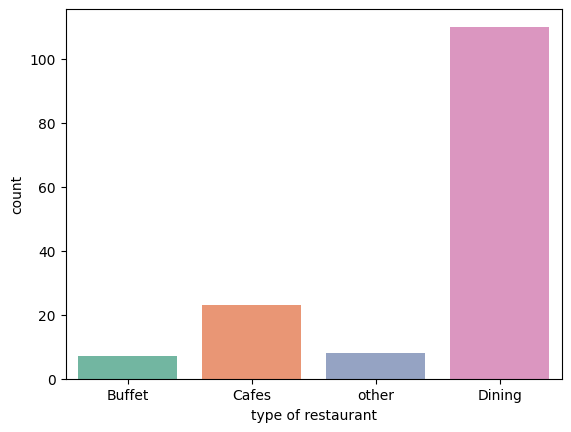

In [61]:
sns.countplot(data=df, x='listed_in(type)', hue='listed_in(type)',
palette='Set2', legend=False)
plt.xlabel("type of restaurant")
plt.ylabel("count")

#### conclusion -- majority of the resturant falls in dining category

#### How many votes has each type of restaurant received from customers?

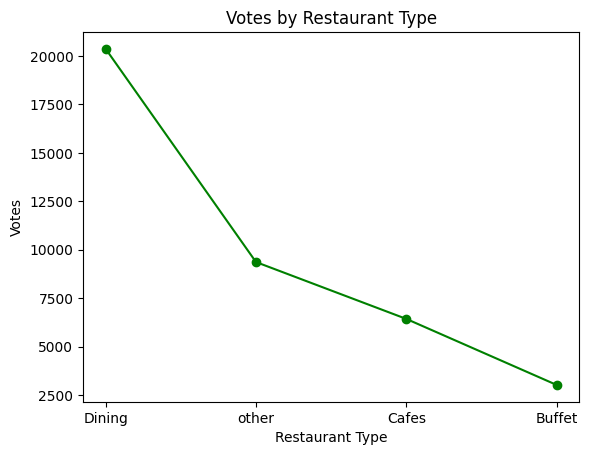

In [55]:
#linegraph
grouped_data = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
plt.plot(grouped_data.index, grouped_data.values, color='green', marker='o')
plt.xlabel("Restaurant Type")
plt.ylabel("Votes")
plt.title("Votes by Restaurant Type")
plt.show()




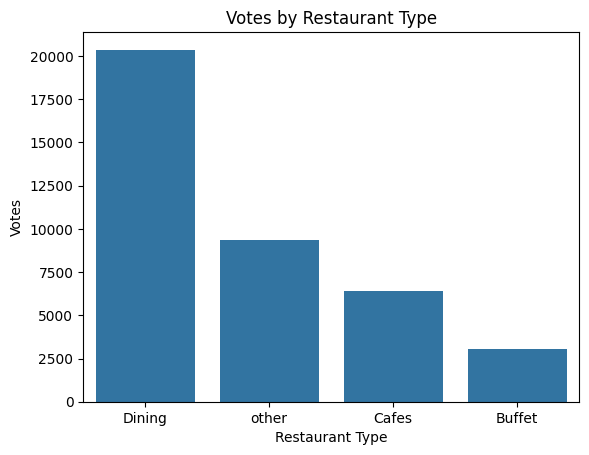

In [56]:
#barplot
grouped_data = df.groupby('listed_in(type)')['votes'].sum().reset_index()
grouped_data = grouped_data.sort_values(by='votes', ascending=False)
sns.barplot(x='listed_in(type)', y='votes', data=grouped_data)
plt.xlabel("Restaurant Type")
plt.ylabel("Votes")
plt.title("Votes by Restaurant Type")
plt.show()


#### concusion --dinning resturants has recieved maximum votes

#### What are the ratings that the majority of restaurants have received?

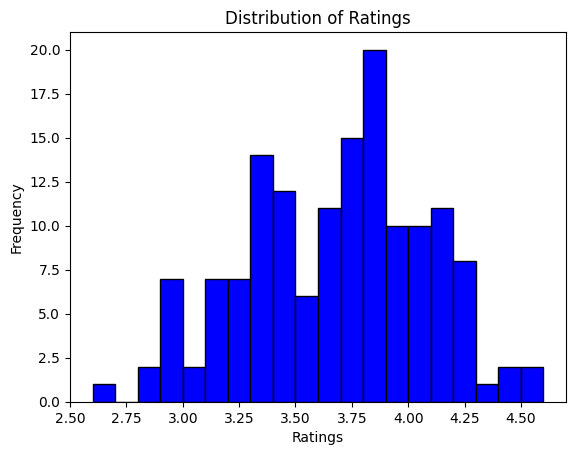

In [57]:
#histogram

plt.hist(df['rate'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

#### conclusion -- majority of resturants received rating from 3.5 to 4

#### Zomato has observed that most couples order most of their food online. What is their average spending on each order?

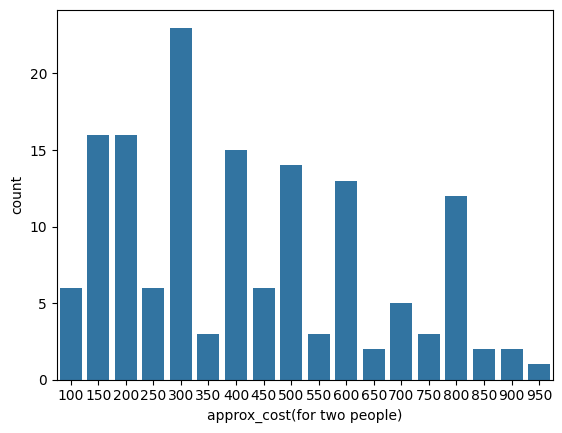

In [58]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.show()

#### conclusion -- the majaority of couple prefers resturants with an approximate cost of 300 rupees

#### Which mode (online or offline) has received the maximum rating?

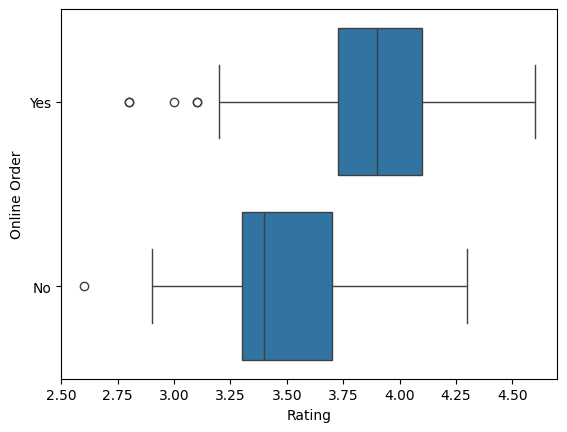

In [59]:
#boxplot
sns.boxplot(x='rate', y='online_order', data=df)
plt.xlabel('Rating')
plt.ylabel('Online Order')
plt.show()

#### conclusion -- offline order received lower rating in comparison to online order

#### 6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

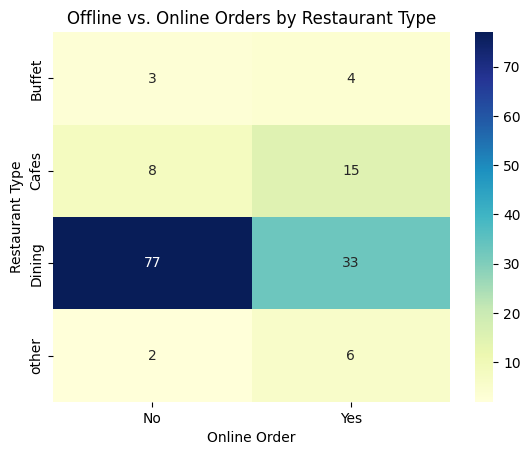

In [60]:
#Heatmap
pd.pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pd.pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.title('Offline vs. Online Orders by Restaurant Type')
plt.show()

conclusion -- dinnig resturants primarily accept offline orders wheres cafes primarilt receive online orders. this suggest that clients prefers order in person at resturants , but prefer online ordering at cafes.